
# Машинное обучение, МКН СПбГУ

### Первое домашнее задание (практическое). NumPy, Pandas


### Формат сдачи
Задания сдаются через сайт emkn. Посылка должна содержать:
* Сделанный ноутбук `HW1_numpy_pandas_pr_Username.ipynb`. `Username` — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

### (8 баллов) Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [1]:
import numpy as np

from numpy.testing import assert_array_equal

import typing as tp
import dataclasses

import matplotlib.pyplot as plt

**1. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```row_indices``` и ```col_indices``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[row_indices[0], col_indices[0]], ... , X[row_indices[N-1], col_indices[N-1]]]```

In [2]:
def construct_array(
        X: tp.Any,
        row_indices: tp.List[int],
        col_indices: tp.List[int]) -> tp.Any:
    """
    Construct slice of given matrix by indices row_indices and col_indices:
    [X[row_indices[0], col_indices[0]], ... , X[row_indices[N-1], col_indices[N-1]]]
    :param X: input matrix
    :param row_indices: list of row indices
    :param col_indices: list of column indices
    :return: matrix slice
    """
    return X[row_indices, col_indices]

In [3]:
@dataclasses.dataclass
class ConstructArrayCase:
    matrix: tp.Any
    row_indices: tp.Any
    col_indices: tp.Any
    result: np.array


CONSTRUCT_ARRAY_TEST_CASES = [
    ConstructArrayCase(matrix=np.array(range(25)).reshape(5, 5),
                       row_indices=[0, 1, 2],
                       col_indices=[0, 1, 2],
                       result=np.array([0, 6, 12])),
    ConstructArrayCase(matrix=np.arange(-10, 10).reshape((5, 4)),
                       row_indices=[1, 2, 3, 3],
                       col_indices=[3, 2, 1, 2],
                       result=np.array([-3, 0, 3, 4])),
    ConstructArrayCase(matrix=np.arange(42).reshape((7, 6)),
                       row_indices=[],
                       col_indices=[],
                       result=np.array([])),
    ConstructArrayCase(matrix=np.arange(42).reshape((7, 6)),
                       row_indices=np.arange(4),
                       col_indices=np.arange(4),
                       result=np.array(np.arange(4)) * 7),
    ConstructArrayCase(matrix=np.arange(42).reshape((42, 1)),
                       row_indices=[0, 1, 41],
                       col_indices=[0, 0, 0],
                       result=np.array([0, 1, 41]))
]

In [4]:
for t in CONSTRUCT_ARRAY_TEST_CASES:
    assert_array_equal(construct_array(t.matrix, t.row_indices, t.col_indices), t.result)
print("Seems all right!")

Seems all right!


**2. (1 балл)** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [5]:
def construct_matrix(first_array: tp.Any, second_array: tp.Any) -> tp.Any:
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    return np.hstack((first_array.reshape(first_array.size, 1), second_array.reshape(second_array.size, 1))).reshape(first_array.size, 2)

In [6]:
@dataclasses.dataclass
class ConstructMatrixCase:
    first_array: tp.Any
    second_array: tp.Any
    result: tp.Any


CONSTRUCT_MATRIX_TEST_CASES = [
    ConstructMatrixCase(
        first_array=np.array([1, 2, 3]),
        second_array=np.array([4, 5, 6]),
        result=np.array([[1, 4], [2, 5], [3, 6]])),
    ConstructMatrixCase(
        first_array=np.array([]),
        second_array=np.array([]),
        result=np.array([]).reshape(0, 2)),
    ConstructMatrixCase(
        first_array=np.array([1]),
        second_array=np.array([2]),
        result=np.array([[1, 2]])),
    ConstructMatrixCase(
        first_array=np.arange(0, 100, 2),
        second_array=np.arange(1, 100, 2),
        result=np.arange(100).reshape(50, 2))
]


In [7]:
for t in CONSTRUCT_MATRIX_TEST_CASES:
    assert_array_equal(construct_matrix(t.first_array, t.second_array), t.result)
print("Seems all right!")

Seems all right!


**3. (0.5 балла)** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3.
Если ненулевых элементов нет, функция должна возвращать ```None```.

In [8]:
def nonzero_product(X: tp.Any) -> tp.Optional[float]:
    y = X.diagonal()
    if y[y != 0].size == 0: return None
    return y[y != 0].prod()
    """
    Compute product of nonzero diagonal elements of matrix
    If all diagonal elements are zeros, then return None
    :param X: array,
    :return: product value or None
    """
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
print(nonzero_product(X))
print(nonzero_product(np.array([[0, 0], [0, 0]])))


3
None


**4. (1 балл)** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5.
Если подходящих элементов нет, функция должна возвращать ```None```.

In [9]:
def max_element_spec(array: tp.Any) -> tp.Optional[float]:
    y = np.array(np.concatenate([np.array([1]), array[:-1]]))
    x = np.vstack([array, array + y])
    ret = x[x == x[0,:]][array.size:]
    if ret.size == 0:
        return None
    return max(ret)
    """
    Moved them by one, stacked initial array with sum of init and moved one. Then left the elements which are equal
    to the same but in a first row. Of course, all of the first row is equal to itself, so I must find max only in
    the ones that are strarting after first row
    """

    """
    Return max element in front of which is zero for input array.
    If appropriate elements are absent, then return None
    :param x: array,
    :return: max element value or None
    """

print(max_element_spec(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])))
print(max_element_spec(np.array([1, 1, 1])))
print(max_element_spec(np.array([0, 0, 1, 0, 2, 0, 3, 4])))

5
None
3


**5. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```value``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```value = 3.6``` ответом будет 4.

In [10]:
def nearest_value(X: tp.Any, value: float) -> tp.Optional[float]:
    y = abs(X - value)
    return X[np.unravel_index(np.argmin(y, axis=None), y.shape)]
    """
    Find nearest value in matrix X.
    If matrix X is empty return None
    :param X: input matrix
    :param value: value to find
    :return: nearest value in matrix or None
    """

print(nearest_value(np.arange(0,10).reshape((2, 5)), 3.6))

4


**6. (0.5 балла)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все встречающиеся в ней строки, но только в единственном экземпляре.

In [11]:
def get_unique_rows(X: tp.Any) -> tp.Any:
    return np.unique(X, axis=0)
    """
    Makes unique rows of matrix
    :param X: matrix
    :return: the sorted unique rows of a matrix
    """
    pass # Your code here

print(get_unique_rows(np.array(
[
    [1, 2, 3],
    [4, 5, 6],
    [1, 2, 3]
]
)))

[[1 2 3]
 [4 5 6]]


**7. (1 балл)** Реализуйте функцию, каторая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

Например, матрица ```np.array([[nan,  1,  2,  3], [4, nan,  5, nan]])``` перейдет в ```np.array([[3, 1, 2, 3], [4, 3, 5, 3]])```

In [12]:
def replace_nans(matrix: tp.Any) -> tp.Any:
    cop = matrix[~np.isnan(matrix)]
    if cop.size == 0:
        return np.nan_to_num(matrix)
    return np.nan_to_num(matrix, nan=cop.mean())
    """
    Replace all nans in matrix with average of other values.
    If all values are nans, then return zero matrix of the same size.
    :param matrix: matrix,
    :return: replaced matrix
    """
print(replace_nans(np.array([np.nan, np.nan, np.nan])))
    
print(replace_nans(np.array([[np.nan,  1,  2,  3], [4, np.nan,  5, np.nan]])))

[0. 0. 0.]
[[3. 1. 2. 3.]
 [4. 3. 5. 3.]]


**8. (1 балл)** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение. Для тестирования можно сгенерировать с помощью метода *numpy.random.randint* случайную матрицу и проверить на ней работу метода. Убедитесь, что в функции не будет происходить деления на ноль. 

In [13]:
def scale(X):
    y = X - np.mean(X, axis=0)
    z = np.std(X, axis = 0)
    if np.where(z==0)[0].size != 0: return None
    return y / z
    """
    Scales each column of matrix X, 
    namely, subtracts its mean from the column and 
    divides the column by the standard deviation.
    """
    

print(scale(np.array([[1, 2, 3], [4, 5, 6]])))

[[-1. -1. -1.]
 [ 1.  1.  1.]]


**9. (1 балл)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения *N*(10,1)

In [14]:
def matr_All(X: tp.Any) -> tp.Any:
    det = np.linalg.det(X)
    tr = sum(X.diagonal())
    mini, maxi = X.min(), X.max()
    norm = np.linalg.norm(X, ord='fro')
    own = np.linalg.eigh(X)[0]
    rev = np.linalg.inv(X)
    return np.array([det, tr, mini, maxi, norm, own, rev])

print(matr_All(np.array(
[
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 4]
])))

print(matr_All(np.random.normal(10, 1, (5, 5))))

[7.999999999999998 7 0 4 4.58257569495584 array([1., 2., 4.])
 array([[1.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.25]])]
[76.86585369256834 53.85425082567708 7.644895766984781 13.2532615044356
 50.92474879025624
 array([-1.18391885,  0.28442893,  0.66026774,  3.13580992, 50.9576631 ])
 array([[-0.65131964, -2.78774907,  2.75327419, -4.65830079,  5.63172156],
       [ 0.50454029,  1.09044499, -1.30923634,  2.10900051, -2.4969138 ],
       [ 0.488634  ,  2.39519761, -1.95968788,  3.38829705, -4.47564998],
       [-0.30828663, -0.8462038 ,  0.89694482, -0.89611786,  1.21819234],
       [ 0.03019078,  0.33032009, -0.540066  ,  0.27593874, -0.0952251 ]])]


**10. (1 балл)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? (в данной задаче можно использовать цикл только для повторения эксперимента) 
Какое распределение у элементов произведения?

8.180853934532507 11.562936170250728


(array([ 2.,  5.,  9., 10., 17., 20., 16.,  6.,  7.,  8.]),
 array([1.58331718, 1.67684025, 1.77036332, 1.8638864 , 1.95740947,
        2.05093254, 2.14445561, 2.23797868, 2.33150175, 2.42502483,
        2.5185479 ]),
 <a list of 10 Patch objects>)

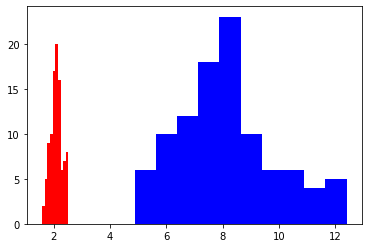

In [15]:
x = []
for i in range(100):
    X = np.random.normal(0, 1, (10, 10))
    Y = np.random.normal(0, 1, (10, 10))
    x.append(np.dot(X, Y).max())
x = np.array(x)
print(x.mean(), np.quantile(x, 0.95))


plt.hist(x, color='blue')
plt.hist(np.log(x), color='red')

Итого, есть основания полагать, что распределение максимума произведений двух случайных матриц логнормально, или, по крайней мере, будет стремится к таковому при стремлении размеров матриц к бесконечности.

### (4 балла) Pandas 


Загрузите данные о пассажирах Титаника из файла *titanic.csv* и ответьте на вопросы ниже. Каждый ответ поясните.

**1. (1 балл)** Опишите данный датасет: какое расределение женщин/мужчин в нем? Сколько пассажиров ехало в каждом классе? Какой средний/минимальный/максимальный возраст пассажиров? Сколько было выживших пассажиров?

In [16]:
import pandas as pd
df = pd.read_csv("titanic.csv", sep="\t")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [18]:
df[['Sex', 'Cabin']].describe()

,Sex,Cabin
count,156,31
unique,2,28
top,male,C123
freq,100,2


**2. (1 балл)** Верно ли, что женщины выживали чаще мужчин? Какие пассажиры выживали чаще: с более дешевыми или дорогими билетами? Верно ли, что чаще выживали более молодые пассажиры?

In [19]:
print('males survival rate:', df[df['Sex'] == 'male']['Survived'].mean())
print('females survival rate:', df[df['Sex'] == 'female']['Survived'].mean())

print(df.groupby(['Pclass'])[['Survived']].mean())

print('people under 40 survival rate: ', df[df['Age'] <= 40]['Survived'].mean())
print('people over 40 survival rate: ', df[df['Age'] > 40]['Survived'].mean())

males survival rate: 0.14
females survival rate: 0.7142857142857143
        Survived
Pclass          
1       0.400000
2       0.466667
3       0.291667
people under 40 survival rate:  0.3619047619047619
people over 40 survival rate:  0.14285714285714285


    Попробуем объяснить данные. Оказывается, что среди мужчин выжило лишь 14 процентов. Полагаю, это связано с тем, что весь персонал был мужской (таковы были времена), и они занимались эвакуацией людей, причем пассажиры мужского пола, вероятно, помогали им. 
    Так же несложно видеть, что пассажиры третьего класса заметно реже спасались. Вероятно, это вызвано низким располажением кают. Различие между первым и вторым можно попробовать объяснить в следующей задаче.
    Ну и наконец, несложно понять, что человек до 40 будет в среднем испытывать гораздо меньше проблем при попытке выжить при крушении корабля, как и удержаться на плаву, пусть и цепляясь за какой нибудь кусок корабля. Опять же, точно не знаю, но, вероятно, большая часть персонала была старше 40, а они занимались пассажирами.

**3. (1 балл)** Сгруппируйте записи по классам пассажиров, в каждой группе посчитайте средний возраст. Верно ли, что во всех классах эта величина примерно одинакова?


In [20]:
df.groupby(['Pclass'])[['Age']].mean()

,Age
Pclass,
1,38.111111
2,28.114828
3,24.307143


В то время, как второй и третий класс имеют примерно одинаковые возрасты, первый класс явно сильно старше оставшихся двух. Так же это может объяснять почему представители второго класса выживали чаще представителей первого. Вероятно их каюты были сильно ближе к уровню моря(если не над ним), ежели чем каюты третьего класса, однако средний представитель второго класса был весьма молодым человеком, сильно моложе типичного представителя перового класса, что объясняет наибольшую выживаемость.

**4. (1 балл)** Найдите все признаки, для которых есть пропуски в данных. Обычно алгоритмы по умолчанию не умеют обрабатывать такие данные. Предложите способы обработки данных с пропусками (не менее двух) и укажите достоинства/недостаки каждого. Проиллюстрируйте их на примере данного датасета.


In [21]:
for t in df.columns:
    if df[t].isnull().values.any(): print(t)

Age
Cabin
Embarked


Начнем с возраста. Это числовой столбец, так что можно заменить все пропуски на средннее, но тогда средний возраст пассажира первого класса (возможно) незаслуженно упадет, а пассажира второго и третьего вырастет. Аналогично можно менять на медианное, однако та же проблема все так же всплывает. Более того, если мы попробуем оценить форму распределения возраста, то заметим в центре огромный столбец, спровоцированный нашей заменой.
В случае Cabin и Embarked, шкалы являются номинальными, просто ограниченный список названий. В зависимости от изучаемых нами взаимосвязей можно делать следующее: допустим исследуется частота выживания пассажиров, севших в блоке С(то есть тех, номер каюты который выглядит как C<номер>). Тогда нам не имеет смысла как либо менять значения nan, мы не можем с полной уверенностью сказать где данный пассажир мог жить, и, если количество значений будет достаточным, можем просто игнорировать всех nan, то есть просто удалять из датасета.
Теперь допустим мы исследуем некую величину из представленных вдоль и поперек(например Fare). Предположим, нам потребовалось одновременно рассматривать пол И кабину, в которой человек расположился. Тогда мы не можем игнорировать nan, или, по крайней мере, очень не хотим, так что логичный выход заменить на самые частые значения, среди сгруппированных по параметрам Fare и Sex одновременно. Аналогичные утверждения применимы и к графе Embarked.


### (2 балла) Matplotlib


Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**1. (1 балл)** Используя функцию *gen_uncertain_data* для генерации выборки, отобразите на графике синим цветом функцию *y(x)*, а также ее доверительный интервал в виде закрашенной зеленым цветом области от *y[i] - error[i]* до *y[i] + error[i]*. Полезной может оказаться функция *fill_between*.


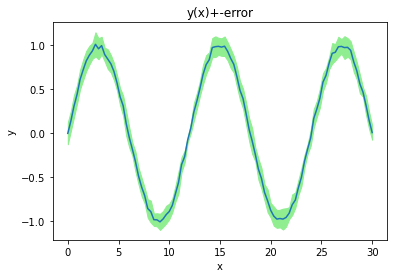

In [22]:
def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error
    
x, y, err = gen_uncertain_data()
plt.plot(x, y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('y(x)+-error')
plt.fill_between(x, y-err, y+err, color='lightgreen')
plt.show()

**2. (1 балл)** Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию *plt.subplots*. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры *figsize*, *sharey*, *sharex* функции *plt.subplots*. Также полезными могут оказаться параметры *bins*, *density* функции *plt.hist*.


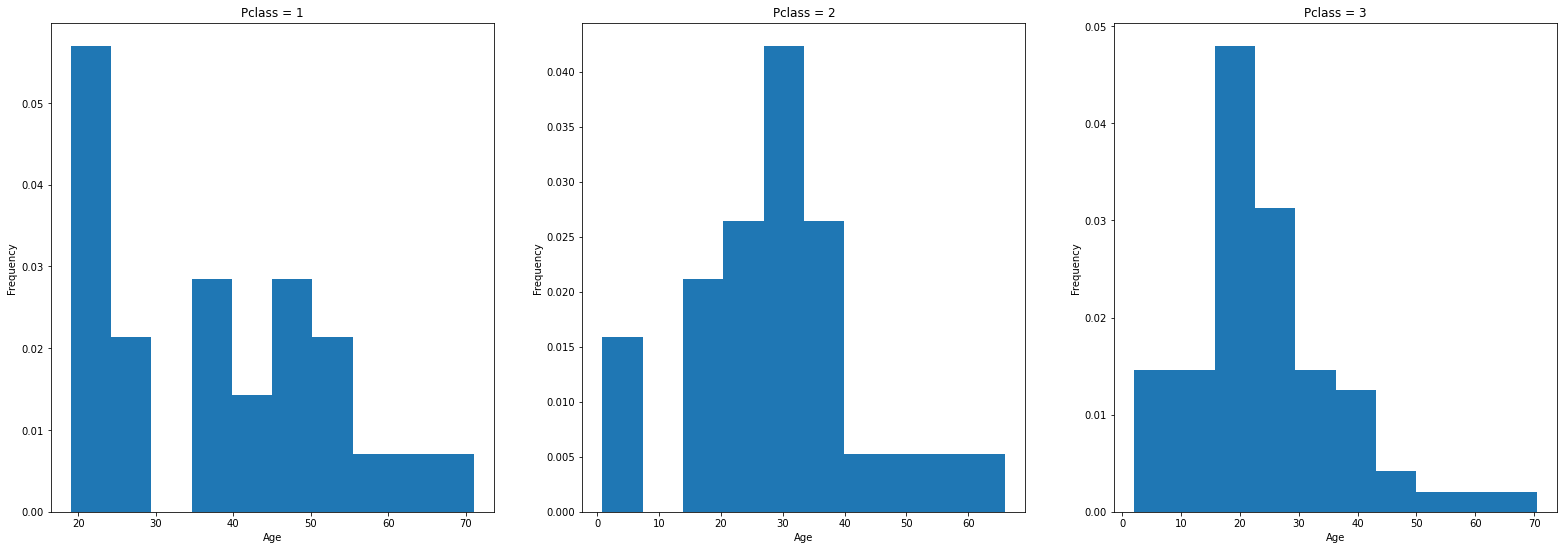

In [26]:
pclassage = df.groupby('Pclass')['Age']

f, axs = plt.subplots(1, 3, figsize = (27, 9))
for key, ax in zip(pclassage.groups.keys(), axs.flatten()):
    ax.hist(pclassage.get_group(key), density = True)
    ax.set(xlabel = 'Age', ylabel = 'Frequency')
    ax.set_title('Pclass = ' + str(key))